# Week 4: Fourier transform: filtering and sampling

The exercise of this week is about Fourier Transform, image filtering and sampling. First load the following libraries that will be necessary.

In [ ]:
!pip install scipy
!pip install scikit-image

In [2]:
%matplotlib inline

from time import time
from skimage.io import imread
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from scipy.fftpack import fft2, ifft2, fftshift
from matplotlib.pyplot import imshow, show, figure
import numpy as np

Load the two images wall.jpg and sidewalk.jpg.

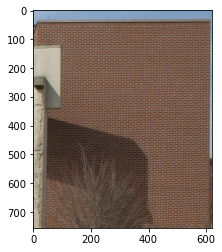

In [3]:
wall = np.array(imread('wall.jpg'), dtype=np.float) / 255.
wall_gray = rgb2gray(wall)
imshow(wall)

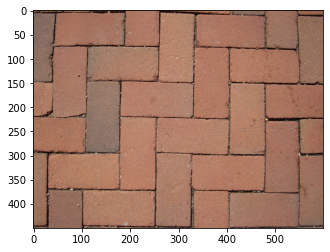

In [4]:
side = np.array(imread('sidewalk.jpg'), dtype=np.float) / 255.
side_gray = rgb2gray(side)
imshow(side)

Preliminary question: which of the two images has the most low pass content? Which one has the most high pass content?

Answer: the sidewalk presents a lot of uniform patches and few edges, so has more low pass content. On the contrary, the wall image has a lot of high frequency components due to the numerous edges.

The following functions will be useful in the course of this tutorial: *fft2*, *ifft2*, *convolve* from scipy and the following function:

In [5]:
def gaussian_filter(shape, sigma):
    """
    Returns a 2D gaussian filter specified by its shape and standard deviation.
    """
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

## Part A: Filtering

Create three Gaussian filters:
- one 5x5 Gaussian low pass filter with standard deviation 1
- one 15x15 Gaussian high pass filter with standard deviation 3.5. Hint: the high pass content of an image can be extracted by subtracting the low pass filtered image from the original image. Hence, you can get a high pass filter kernel from a low pass one by subtracting the low pass filter kernel from a unit impulse filter. A unit impulse filter is a filter full of 0s with a single 1 in the middle, that once convolved with an image returns the same image.
- one band pass filter. To do this, create first a 15x15 Gaussian filter with standard deviation 1 and then convolve this low pass filter with the previous high pass filter to create the band pass filter. Indeed, convolution is associative: img * band_pass = (img * low_pass) * high_pass = img * (low_pass * high_pass).

You can then visualize your filters in spatial and frequency domains (using *fft2* and *fftshift* from scipy for the latter). Since the filters are complex in the frequency domain, use *np.abs()* to display the magnitude of the filter.

Low pass filter:
In spatial domain:


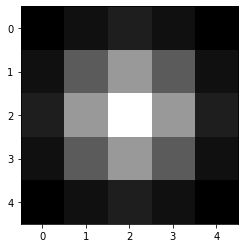

In frequency domain:


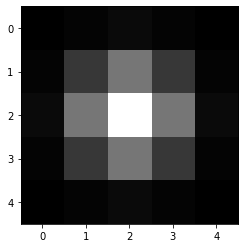

High pass filter:
In spatial domain:


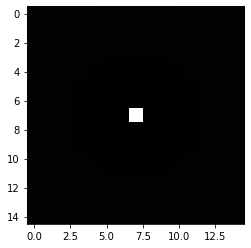

In frequency domain:


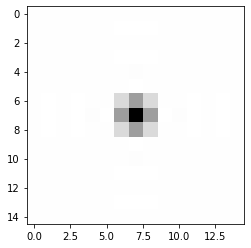

Band pass filter (frequency domain):


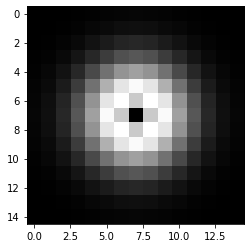

In [6]:
# Low pass filter
print("Low pass filter:")
lpf = gaussian_filter((5, 5), 1)
print("In spatial domain:")
imshow(lpf, cmap='gray')
show()
print("In frequency domain:")
imshow(np.abs(fftshift(fft2(lpf))), cmap='gray')
show()

# High pass filter
print("High pass filter:")
hpf = gaussian_filter((15, 15), 3.5)
hpf = -hpf
hpf[7, 7] = hpf[7, 7] + 1.
# Or use scipy.signal.unit_impulse((15, 15), idx='mid')
print("In spatial domain:")
imshow(hpf, cmap='gray')
show()
print("In frequency domain:")
imshow(np.abs(fftshift(fft2(hpf))), cmap='gray')
show()

# Band pass filter
print("Band pass filter (frequency domain):")
bpf = convolve(gaussian_filter((15, 15), 1), hpf)
imshow(np.abs(fftshift(fft2(bpf))), cmap='gray')
show()

Apply these three filters to the two sample grayscale images in spatial domain first by convolving the image with the kernel, and in frequency domain secondly by taking the Fourier tranform of both the image and the filter kernel and multiplying them. Compare the runtimes of spatial and frequency domain filtering, using the *time* function of python. Compare the filtering results of two images by visualizing the filtered images in both spatial and frequency domains. Check that your initial guess about the low/high pass content of the images is correct.

### Filtering in spatial domain

Original image:


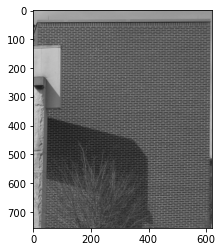

Low pass filter:


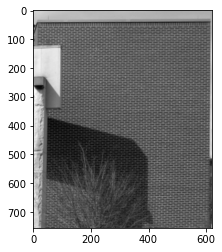

Timing: 0.010956048965454102

High pass filter:


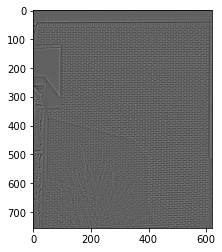

Timing: 0.11907386779785156

Band pass filter:


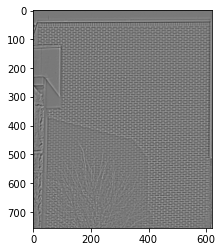

Timing: 0.11827301979064941



In [7]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

start = time()
wall_lowp = convolve(wall_gray, lpf)
end = time()
print("Low pass filter:")
imshow(wall_lowp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
wall_highp = convolve(wall_gray, hpf)
end = time()
print("High pass filter:")
imshow(wall_highp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
wall_bandp = convolve(wall_gray, bpf)
end = time()
print("Band pass filter:")
imshow(wall_bandp, cmap='gray')
show()
print("Timing:", end - start)
print()

Original image:


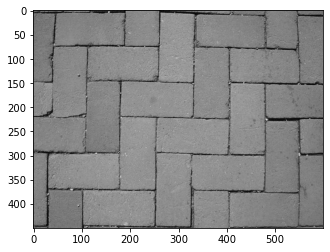

Low pass filter:


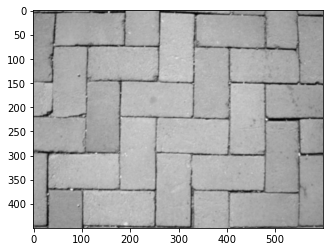

Timing: 0.006448268890380859

High pass filter:


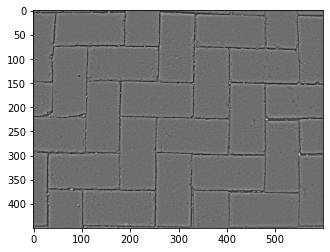

Timing: 0.0683588981628418

Band pass filter:


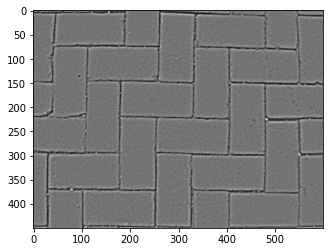

Timing: 0.07039284706115723



In [8]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

start = time()
side_lowp = convolve(side_gray, lpf)
end = time()
print("Low pass filter:")
imshow(side_lowp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
side_highp = convolve(side_gray, hpf)
end = time()
print("High pass filter:")
imshow(side_highp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
side_bandp = convolve(side_gray, bpf)
end = time()
print("Band pass filter:")
imshow(side_bandp, cmap='gray')
show()
print("Timing:", end - start)
print()

### Filtering in frequency domain

Note: the output of *ifft2* is a numpy array with complex values. You can use the command *.astype(float)* to convert it back to real numbers.

Original image:


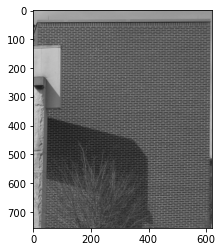

Low pass filter:


<ipython-input-9-8ab1d21e6b47>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  wall_lowp = ifft2(WALL_LOWP).astype(float)


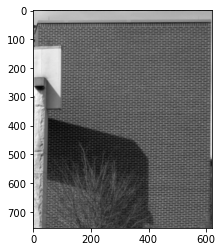

<ipython-input-9-8ab1d21e6b47>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  wall_highp = ifft2(WALL_HIGHP).astype(float)


Timing: 0.07133960723876953

High pass filter:


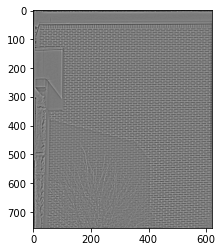

Timing: 0.06587696075439453



<ipython-input-9-8ab1d21e6b47>:33: ComplexWarning: Casting complex values to real discards the imaginary part
  wall_bandp = ifft2(WALL_BANDP).astype(float)


Band pass filter:


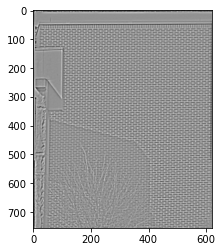

Timing: 0.06424498558044434



In [9]:
print("Original image:")
imshow(wall_gray, cmap='gray')
show()

start = time()
WALL = fft2(wall_gray)
LPF = fft2(lpf, wall_gray.shape)
WALL_LOWP = np.multiply(WALL, LPF)
wall_lowp = ifft2(WALL_LOWP).astype(float)
end = time()
print("Low pass filter:")
imshow(wall_lowp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
WALL = fft2(wall_gray)
HPF = fft2(hpf, wall_gray.shape)
WALL_HIGHP = np.multiply(WALL, HPF)
wall_highp = ifft2(WALL_HIGHP).astype(float)
end = time()
print("High pass filter:")
imshow(wall_highp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
WALL = fft2(wall_gray)
BPF = fft2(bpf, wall_gray.shape)
WALL_BANDP = np.multiply(WALL, BPF)
wall_bandp = ifft2(WALL_BANDP).astype(float)
end = time()
print("Band pass filter:")
imshow(wall_bandp, cmap='gray')
show()
print("Timing:", end - start)
print()

Original image:


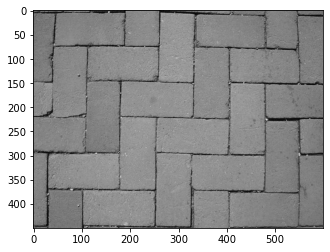

Low pass filter:


<ipython-input-10-d685c9ea070d>:9: ComplexWarning: Casting complex values to real discards the imaginary part
  side_lowp = ifft2(SIDE_LOWP).astype(float)


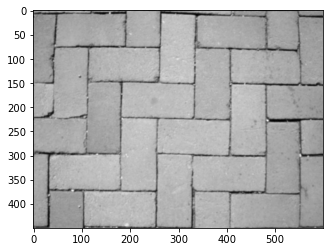

<ipython-input-10-d685c9ea070d>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  side_highp = ifft2(SIDE_HIGHP).astype(float)


Timing: 0.018333911895751953

High pass filter:


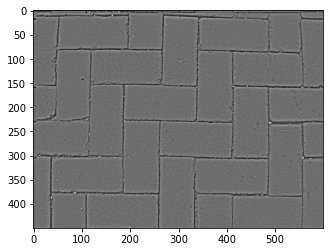

Timing: 0.01658916473388672

Band pass filter:


<ipython-input-10-d685c9ea070d>:33: ComplexWarning: Casting complex values to real discards the imaginary part
  side_bandp = ifft2(SIDE_BANDP).astype(float)


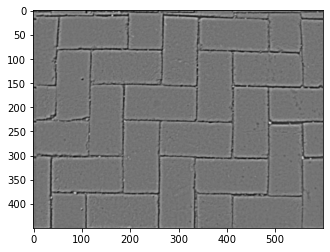

Timing: 0.016991853713989258



In [10]:
print("Original image:")
imshow(side_gray, cmap='gray')
show()

start = time()
SIDE = fft2(side_gray)
LPF = fft2(lpf, side_gray.shape)
SIDE_LOWP = np.multiply(SIDE, LPF)
side_lowp = ifft2(SIDE_LOWP).astype(float)
end = time()
print("Low pass filter:")
imshow(side_lowp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
SIDE = fft2(side_gray)
HPF = fft2(hpf, side_gray.shape)
SIDE_HIGHP = np.multiply(SIDE, HPF)
side_highp = ifft2(SIDE_HIGHP).astype(float)
end = time()
print("High pass filter:")
imshow(side_highp, cmap='gray')
show()
print("Timing:", end - start)
print()

start = time()
SIDE = fft2(side_gray)
BPF = fft2(bpf, side_gray.shape)
SIDE_BANDP = np.multiply(SIDE, BPF)
side_bandp = ifft2(SIDE_BANDP).astype(float)
end = time()
print("Band pass filter:")
imshow(side_bandp, cmap='gray')
show()
print("Timing:", end - start)
print()

## Part B: Sampling

Downsample both images to one fourth of the resolution by taking every second row and column. You can use numpy array slicing for this: *my_array[start:end:step]*. Compare the results in terms of distortions and unexpected effects. Explain why the quality of the two downsampled images differ. 

Downsampled wall image:


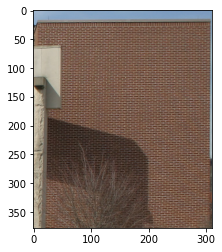

Downsampled sidewalk image:


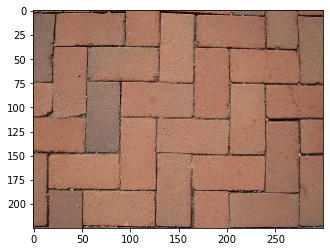

In [11]:
downsampled_wall = wall[::2, ::2, :]
print("Downsampled wall image:")
imshow(downsampled_wall)
show()

downsampled_side = side[::2, ::2, :]
print("Downsampled sidewalk image:")
imshow(downsampled_side)
show()

The downsampled wall image suffers from undesired artifacts due to the great number of high frequency components. This phenomenon is called aliasing. The low frequency sidewalk image does not have those artifacts.  

Create three 15x15 Gaussian low pass filters with standard deviations 0.5, 1 and 1.5 and apply them to the color image wall.jpg. You can filter the three channels separately and gather them in an RGB image with the numpy function *np.stack([r_img, g_img, b_img], axis=-1)*. Downsample the three filtered images to one fourth resolution. Compare the resulting downsampled images in terms of quality.

Downsampled image after filter 0:


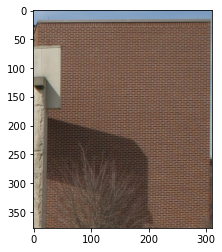

Downsampled image after filter 1:


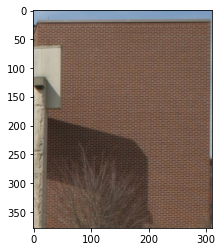

Downsampled image after filter 2:


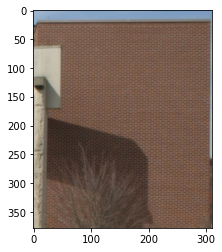

In [12]:
# Create the filters
lpf0 = gaussian_filter((15, 15), 0.5)
lpf1 = gaussian_filter((15, 15), 1)
lpf2 = gaussian_filter((15, 15), 1.5)

# Convolve them with the RGB image
wall_lowp0 = np.stack([convolve(wall[:, :, 0], lpf0), convolve(wall[:, :, 1], lpf0), convolve(wall[:, :, 2], lpf0)], axis=-1)
wall_lowp1 = np.stack([convolve(wall[:, :, 0], lpf1), convolve(wall[:, :, 1], lpf1), convolve(wall[:, :, 2], lpf1)], axis=-1)
wall_lowp2 = np.stack([convolve(wall[:, :, 0], lpf2), convolve(wall[:, :, 1], lpf2), convolve(wall[:, :, 2], lpf2)], axis=-1)

# Downsample the resulting images
wall_lowp0 = wall_lowp0[::2, ::2, :]
print("Downsampled image after filter 0:")
imshow(wall_lowp0)
show()

wall_lowp1 = wall_lowp1[::2, ::2, :]
print("Downsampled image after filter 1:")
imshow(wall_lowp1)
show()

wall_lowp2 = wall_lowp2[::2, ::2, :]
print("Downsampled image after filter 2:")
imshow(wall_lowp2)
show()

Filtering the high pass content of the image more and more results in decreasing aliasing artifacts.

## Bonus: for those that finished earlier

Load the blurred road signs image and using your fresh knowledge about filters, design the perfect filter to make the text readable.

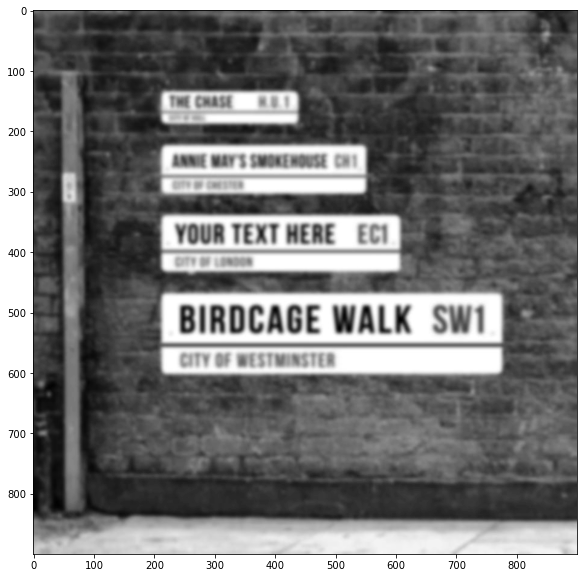

In [13]:
blurred_road_signs = np.array(imread('blurred_road_signs.jpg', as_gray=True), dtype=np.float) / 255.

figure(figsize=(10, 10))
imshow(blurred_road_signs, cmap='gray')
show()

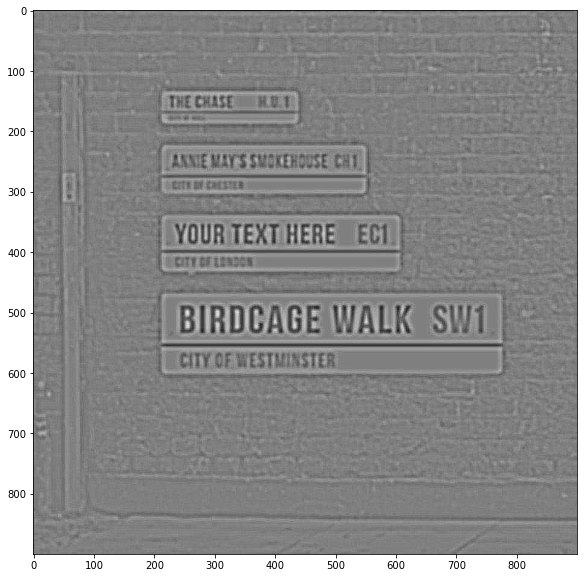

In [14]:
# We create a high pass filter to sharpen the text
hpf = gaussian_filter((5, 5), 1.5)
hpf = -hpf
hpf[2, 2] = hpf[2, 2] + 1

sharpened_road_signs = convolve(blurred_road_signs, hpf)
figure(figsize=(10, 10))
imshow(sharpened_road_signs, cmap='gray')
show()